In [11]:
from __future__ import print_function
import os
import pandas as pd
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [12]:
#Start by setting the current directory and henceforth working relative to it
os.chdir('../Data Files')

In [13]:
#read the data from into a pandas.DataFrame
air_miles = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles.Month

In [14]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 2)


In [15]:
#Let's see first 10 rows of it
air_miles.head(10)

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0
1963-06,1963-06,9644.0
1963-07,1963-07,10466.0
1963-08,1963-08,10748.0
1963-09,1963-09,9963.0


In [16]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'
                         },
                inplace=True
                )

In [17]:
#Check for missing values and remove the row
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


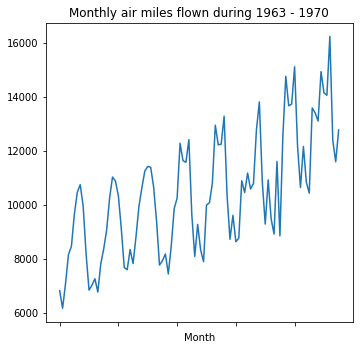

In [18]:
#Plot the time series of air miles flown
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')
plt.savefig('../plots/ch2/B07887_02_13.png', format='png', dpi=300)

In [19]:
adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')
# the keyword argument autolag='AIC' instructs the function to choose a suitable number of lags for the
# test by maximizing the Akaike Information Criteria (AIC).

In [20]:
print('p-val of the ADF test in air miles flown:', adf_result[1])

p-val of the ADF test in air miles flown: 0.9945022811234028


In [21]:
adf_result


(1.0229489778119782,
 0.9945022811234028,
 11,
 84,
 {'1%': -3.510711795769895,
  '5%': -2.8966159448223734,
  '10%': -2.5854823866213152},
 1356.2366247658094)

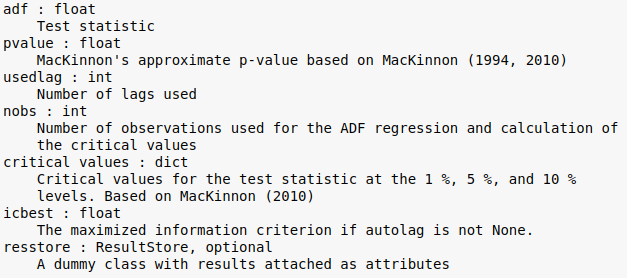